## Extending experiments on Deceptive/Truthful Reviews Dataset

In our 1st phase of CG/OR classification we produced three different models to classify our CG/OR dataset:   
1. Openai GPT-2 output detector   
2. Finetuned RoBERTa on CG/OR dataset   
3. nb-svm trained on CG/OR dataset   
Out of the above three best performing model was our Finetuned RoBERTa finetuned on CG/OR dataset.  

In this 2nd phase we were trying to understand performance of our classifier on Deceptive Reviews Dataset.   
So, in order to do that we wanted to evaluate below strategy:   
1. Consider Deceptive Reviews equivalent to CG reviews and, Truthful Reviews under OR reviews. 
2. Test the performance of our classifier on complete Deceptive Reviews Dataset   
   and compare with other classifiers.   
3. Finetune our RoBERTa classifier on a subset of Deceptive Reviews Dataset   
   and check performance on the remaining test set.   
   3.1 Do 80-20 train/test split on Deceptive Reviews Dataset.    
   3.2 Take 20% of above split and keep it as our test set for final evaluation.   
   3.3 Merge 80% of above train split into our original CG/OR training dataset.   
   3.4 Validation set remains same as our original CG/OR validation dataset.   
   3.5 Retrain our CG/OR classifier with new training data and validate performance on above validation test.    
   3.6 Evaluate performance on the above test set.    

### Test CG/OR Existing classifiers on complete Deceptive Reviews Dataset

#### Performance of Openai GPT-2 output detector on Deceptive Reviews Dataset

In [20]:
print(f"Accuracy: {acc*100}; Precision:{precision*100}; Recall:{recall*100}")

Accuracy: 54.25; Precision:52.36439499304589; Recall:94.125


In [21]:
print(classification_report(y_true, y_pred, target_names=["CG","OR"]))

              precision    recall  f1-score   support

          CG       0.71      0.14      0.24       800
          OR       0.52      0.94      0.67       800

    accuracy                           0.54      1600
   macro avg       0.62      0.54      0.46      1600
weighted avg       0.62      0.54      0.46      1600



#### Performance of our finetuned RoBERTa on Deceptive Reviews Dataset

In [19]:
print(f"Accuracy: {acc*100}; Precision:{precision*100}; Recall:{recall*100}")

Accuracy: 51.6875; Precision:50.8749189889825; Recall:98.125


In [20]:
print(classification_report(y_true, y_pred, target_names=["CG","OR"]))

              precision    recall  f1-score   support

          CG       0.74      0.05      0.10       800
          OR       0.51      0.98      0.67       800

    accuracy                           0.52      1600
   macro avg       0.62      0.52      0.38      1600
weighted avg       0.62      0.52      0.38      1600



#### Performance of nb-svm classifier on Deceptive Reviews Dataset

In [35]:
print(f"Accuracy: {acc*100}; Precision:{precision*100}; Recall:{recall*100}")

Accuracy: 50.18749999999999; Precision:50.093926111458984; Recall:100.0


In [36]:
print(classification_report(y_true, y_pred, target_names=["CG","OR"]))

              precision    recall  f1-score   support

          CG       1.00      0.00      0.01       800
          OR       0.50      1.00      0.67       800

    accuracy                           0.50      1600
   macro avg       0.75      0.50      0.34      1600
weighted avg       0.75      0.50      0.34      1600



After looking at above performance of all the three classifiers one thing which came pretty evident was
all the three classifiers were predictive all the reviews(both Deceptive & Truthful) as OR.   
So, as a standard practice we wanted to understand the auc-roc curve to see if we classifiers are able to perform any better at any other optimal value of confidence threshold other than current value of 0.5 because,     
1. When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly.   
2. When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values.    
3. When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points.   

#### AUC-ROC analysis of openai GPT-2 output detector model on Deceptive Reviews Data Set

In [23]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_true, preds_probas)

print(auc_score)

0.5951039062500001


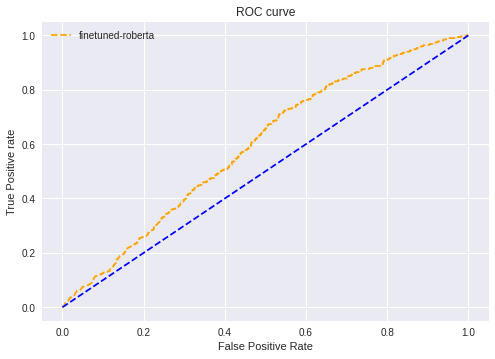

In [24]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='finetuned-roberta')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

#### AUC-ROC analysis of our finetuned RoBERTa model on Deceptive Reviews Data Set

In [24]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_true, preds_probas)

print(auc_score)

0.6958562500000001


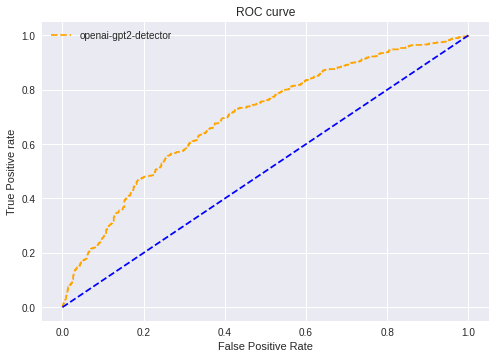

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='openai-gpt2-detector')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

#### AUC-ROC analysis of nbsvm model on Deceptive Reviews Data Set

In [38]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_true, preds_probas)

print(auc_score)

0.5750296875


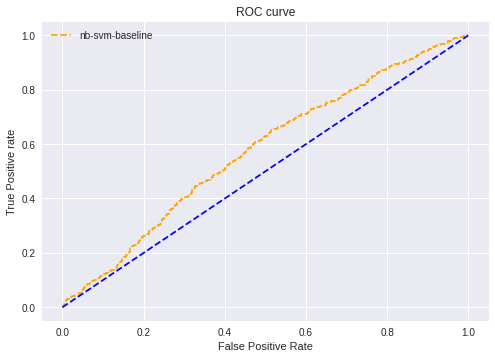

In [46]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='nb-svm-baseline')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show();

It is evident from the plots that the AUC for our finetuned RoBERTa model is higher than that for openai gpt-2 and nb-svm models ROC curve.   
Therefore, we can say that our finetuned RoBERTa model did a better job of classifying deceptive classes from truthful ones in the deceptive reviews dataset.  
Let's also check model performance at the optimal classification threshold.

In [46]:
optimal_proba_cutoff

0.9995717406272888

In [48]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_true, y_pred), accuracy_score(y_true, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_true, y_pred), precision_score(y_true, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_true, y_pred), recall_score(y_true, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_true, y_pred), f1_score(y_true, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.5225, 0.64125
Precision Score Before and After Thresholding: 0.5118110236220472, 0.6632947976878613
Recall Score Before and After Thresholding: 0.975, 0.57375
F1 Score Before and After Thresholding: 0.6712564543889844, 0.6152815013404827


In [50]:
print("Classification Report After Thresholding\n")
print(classification_report(y_true, roc_predictions, target_names=["CG","OR"]))

Classification Report After Thresholding

              precision    recall  f1-score   support

          CG       0.62      0.71      0.66       800
          OR       0.66      0.57      0.62       800

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.64      1600



As can be seen model's performance improved with an optimal threshold and, we are able to get a model which performs at 65% accuracy at a confidence cutoff threshold of 0.9995717406272888

Next, we can check if retraining our classifier on a subset(80%) of deceptive reviews along with our original CG/OR dataset improves the model performance furthermore and by how much?

#### Now, Retraining CG/OR classifier on Deceptive + CG/OR mixed dataset

We kept all the training parameters same as in our 1st phase of CG/OR classification

In [7]:
model_name = "roberta-base"
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 1
LEARNING_RATE = 1e-05

Accuracy on our original CG/OR validation dataset comes out to be 96.36% which is nearly same as our previous performance of 96.91% on the CG/OR validation dataset. 
While performance over our 20% test set containing only deceptive and truthful reviews comes out to be as below:

In [22]:
print(f"Accuracy: {acc*100}; Precision:{precision*100}; Recall:{recall*100}")

Accuracy: 76.875; Precision:91.17647058823529; Recall:58.86075949367089


In [23]:
print(classification_report(y_true, y_pred, target_names=["CG","OR"]))

              precision    recall  f1-score   support

          CG       0.70      0.94      0.81       162
          OR       0.91      0.59      0.72       158

    accuracy                           0.77       320
   macro avg       0.81      0.77      0.76       320
weighted avg       0.81      0.77      0.76       320



Retraining(or finetuning) our RoBERTa model on mixed dataset of old CG/OR with Deceptive reviews results in a model
of almost same performance on our old CG/OR validation set while with an improved performance having 77% accuracy on
Deceptive reviews dataset.   
Comparing our old model trained on CG/OR dataset only had an accuracy of 65% with optimal threshold.   
There is 12% boost that is coming due to retraining.

Again, let's see the auc-roc analysis as well

In [25]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_true, preds_probas)

print(auc_score)

0.9249492108141898


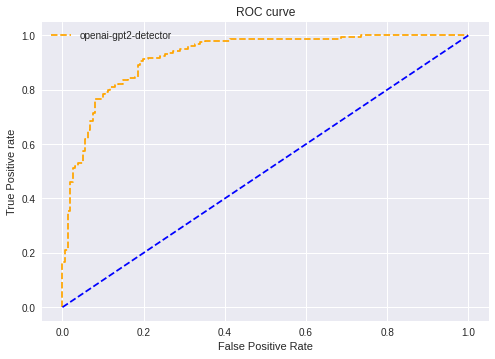

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='openai-gpt2-detector')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [28]:
optimal_proba_cutoff

0.43823137879371643

In [29]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_true, y_pred), accuracy_score(y_true, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_true, y_pred), precision_score(y_true, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_true, y_pred), recall_score(y_true, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_true, y_pred), f1_score(y_true, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.76875, 0.796875
Precision Score Before and After Thresholding: 0.9117647058823529, 0.911504424778761
Recall Score Before and After Thresholding: 0.5886075949367089, 0.6518987341772152
F1 Score Before and After Thresholding: 0.7153846153846154, 0.7601476014760148


In [30]:
print("Classification Report After Thresholding\n")
print(classification_report(y_true, roc_predictions, target_names=["CG","OR"]))

Classification Report After Thresholding

              precision    recall  f1-score   support

          CG       0.73      0.94      0.82       162
          OR       0.91      0.65      0.76       158

    accuracy                           0.80       320
   macro avg       0.82      0.80      0.79       320
weighted avg       0.82      0.80      0.79       320



With an optimal threshold of 0.43823137879371643, our retrained model can perform at ~80% accuracy which is numerically 2% higher than performance at cutoff threshold of 0.5

Now, let's see if finetuning for another epoch makes any improvement on our deceptive reviews test set.

#### Finetuning our RoBERTa for another epoch

Now, after training for one more epoch accuracy on our original CG/OR validation dataset comes out to be 98.13% which is nearly ~1% higher than our previous performance of 96.91% on the CG/OR validation dataset.
While performance over our 20% test set containing only deceptive and truthful reviews comes out to be as below:

In [20]:
print(f"Accuracy: {acc*100}; Precision:{precision*100}; Recall:{recall*100}")

Accuracy: 87.8125; Precision:93.43065693430657; Recall:81.0126582278481


In [21]:
print(classification_report(y_true, y_pred, target_names=["CG","OR"]))

              precision    recall  f1-score   support

          CG       0.84      0.94      0.89       162
          OR       0.93      0.81      0.87       158

    accuracy                           0.88       320
   macro avg       0.89      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



We are able to reach a performance of ~88% on our test set of only deceptive/truthful reviews dataset.